Функция генерации определенного количества СВ (для каждого закона)
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла

3 выборки:
до 10
до 20
до 40
до 100
и больше 100 на свой выбор

для выборок посчитать оценки
мат ожиадание
ско в двух видах (смещенная и несмещенная)
медиана

Вторая часть (на следующую пару)
добавить шум (по этому же закону и по другому)
посчитать корреляцию и ковариацию для исходного и зашумленного ряда 

Ход работы:
1) Биномиальное распределение

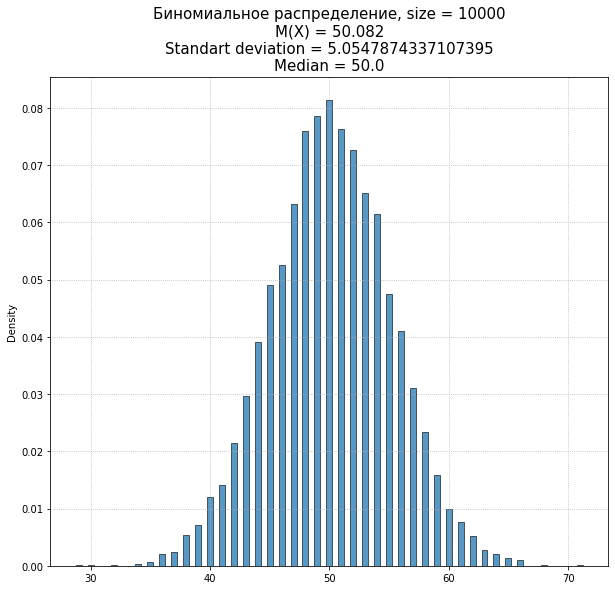

In [1]:
import scipy.stats as spystats
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np
from IPython.display import HTML

rc('animation', html='jshtml')

n, p = 100, 0.5
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        binom_data = spystats.binom(n, p).rvs(size = s)
        sb.histplot(binom_data, stat="density", discrete=True, shrink= 0.5)
        plt.title("Биномиальное распределение, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                binom_data.mean(), binom_data.std(), np.median(binom_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

2) Распределение Бернулли

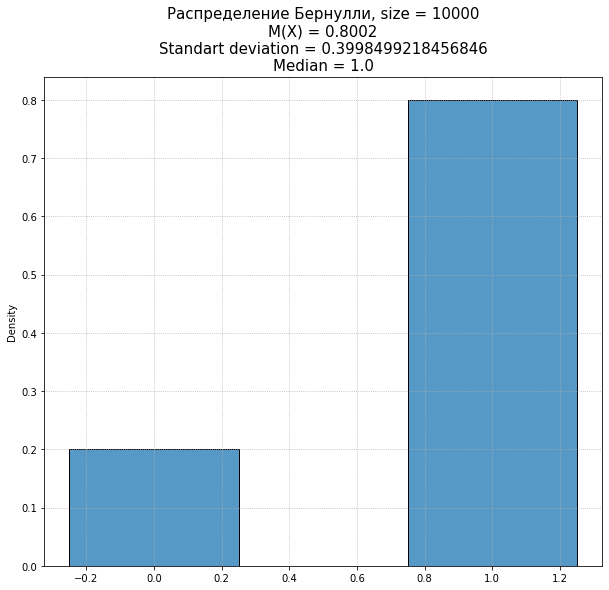

In [2]:
p, s = 0.8, 10000
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        bern_data = spystats.bernoulli(p).rvs(size = s)
        sb.histplot(bern_data, stat="density", discrete=True, shrink= 0.5)
        plt.title("Распределение Бернулли, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                bern_data.mean(), bern_data.std(), np.median(bern_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

3) Геометрическое распределение

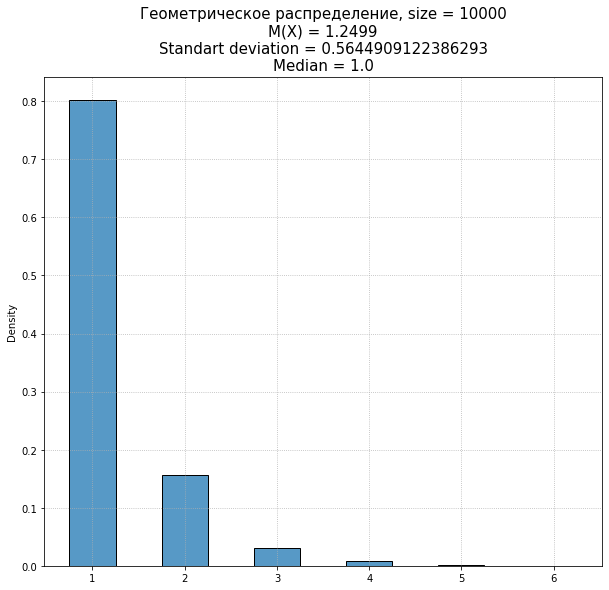

In [3]:
p, s = 0.8, 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        geom_data = spystats.geom(p).rvs(size = s)
        sb.histplot(geom_data, stat="density", discrete=True, shrink= 0.5)
        plt.title("Геометрическое распределение, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                geom_data.mean(), geom_data.std(), np.median(geom_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

4) Распределение Пуассона

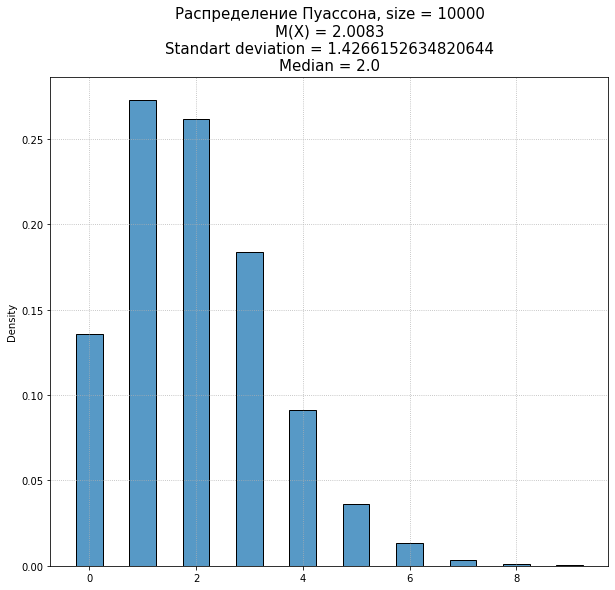

In [4]:
mu, s = 2, 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        poisson_data = spystats.poisson(mu).rvs(size = s)
        sb.histplot(poisson_data, stat="density", discrete=True, shrink= 0.5)
        plt.title("Распределение Пуассона, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                poisson_data.mean(), poisson_data.std(), np.median(poisson_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

5) Экспоненциальное распределение

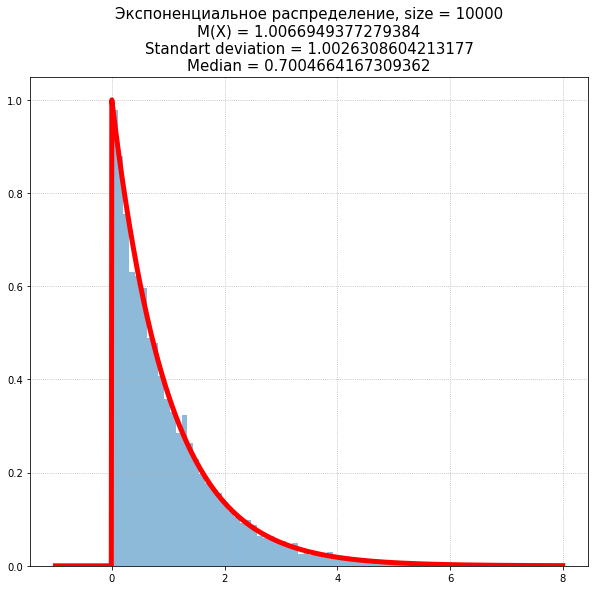

In [5]:
s = 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        expon_data = spystats.expon.rvs(size = s)
        grid = np.linspace(-1, 8, 1000)
        plt.hist(expon_data, bins="auto", density=True,
                        alpha=0.5, label="Гистограмма выборки")
        plt.plot(grid, spystats.expon.pdf(grid), color="red",
                        lw=5, label="Плотность случайной величины")
        plt.title("Экспоненциальное распределение, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                expon_data.mean(), expon_data.std(), np.median(expon_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

6) Равномерное распределение

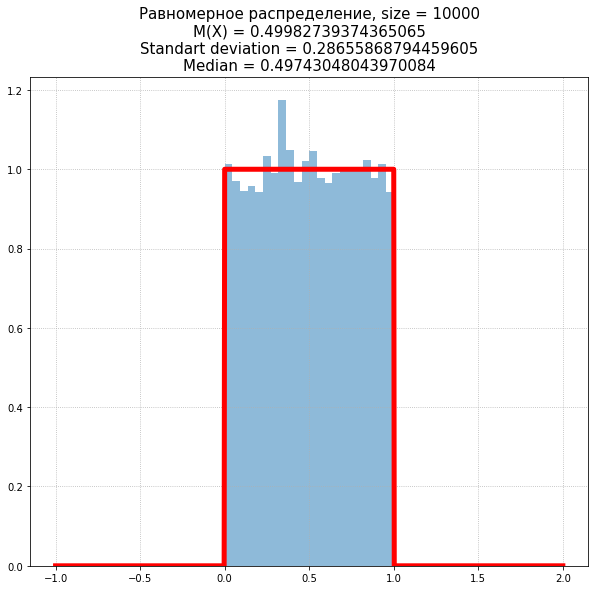

In [6]:
s = 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        uniform_data = spystats.uniform.rvs(size = s)
        grid = np.linspace(-1, 2, 1000)
        plt.hist(uniform_data, bins="auto", density=True,
                        alpha=0.5, label="Гистограмма выборки")
        plt.plot(grid, spystats.uniform.pdf(grid), color="red",
                        lw=5, label="Плотность случайной величины")
        plt.title("Равномерное распределение, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                uniform_data.mean(), uniform_data.std(), np.median(uniform_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

7) Нормальное распределение

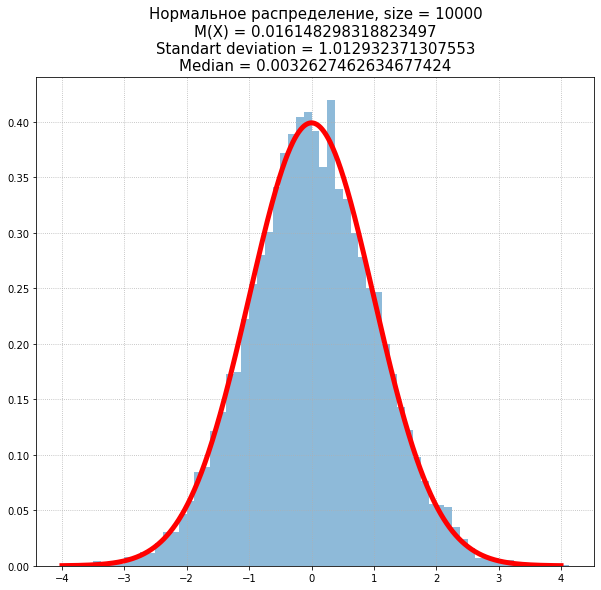

In [7]:
s = 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        norm_data = spystats.norm.rvs(size = s)
        grid = np.linspace(-4, 4, 1000)
        plt.hist(norm_data, bins="auto", density=True,
                        alpha=0.5, label="Гистограмма выборки")
        plt.plot(grid, spystats.norm.pdf(grid), color="red",
                        lw=5, label="Плотность случайной величины")
        plt.title("Нормальное распределение, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                norm_data.mean(), norm_data.std(), np.median(norm_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

8) Распределение хи-квадрат

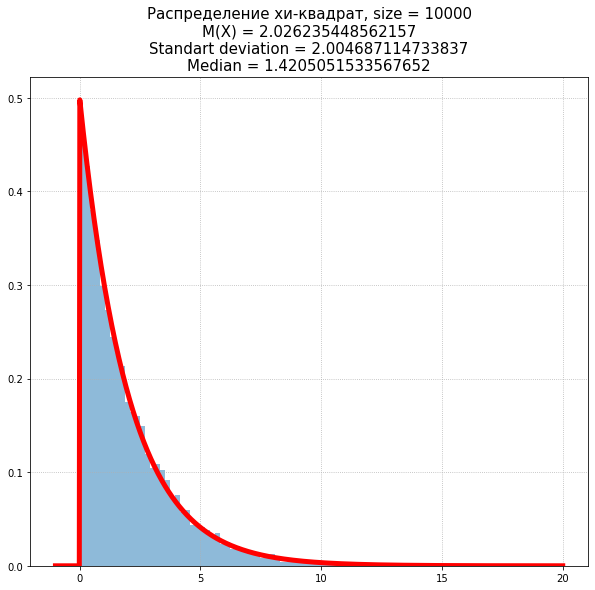

In [8]:
k, s = 2, 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        x2_data = spystats.chi2(k).rvs(size = s)
        grid = np.linspace(-1, 20, 1000)
        plt.hist(x2_data, bins="auto", density=True,
                        alpha=0.5, label="Гистограмма выборки")
        plt.plot(grid, spystats.chi2(k).pdf(grid), color="red",
                        lw=5, label="Плотность случайной величины")
        plt.title("Распределение хи-квадрат, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                x2_data.mean(), x2_data.std(), np.median(x2_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

9) Распределение Стьюдента

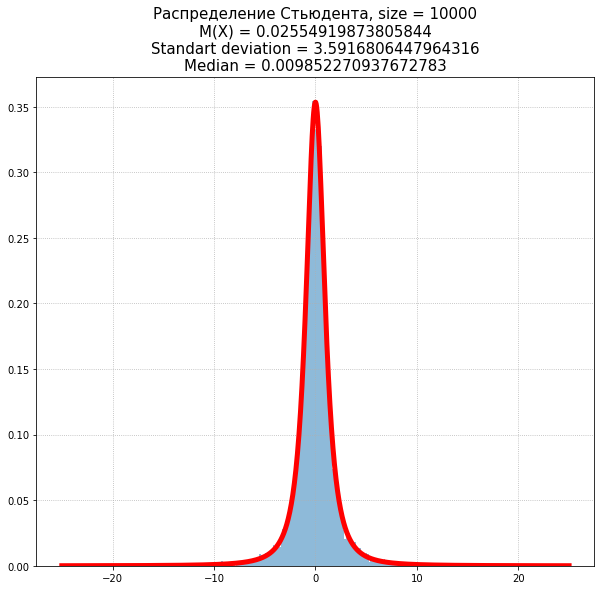

In [9]:
k, s = 2, 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        t_data = spystats.t(k).rvs(size = s)
        grid = np.linspace(-25, 25, 1000)
        plt.hist(t_data, bins="auto", density=True, range=(-25, 25),
                        alpha=0.5, label="Гистограмма выборки")
        plt.plot(grid, spystats.t(k).pdf(grid), color="red",
                        lw=5, label="Плотность случайной величины")
        plt.title("Распределение Стьюдента, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                t_data.mean(), t_data.std(), np.median(t_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

10) Распределение Фишера

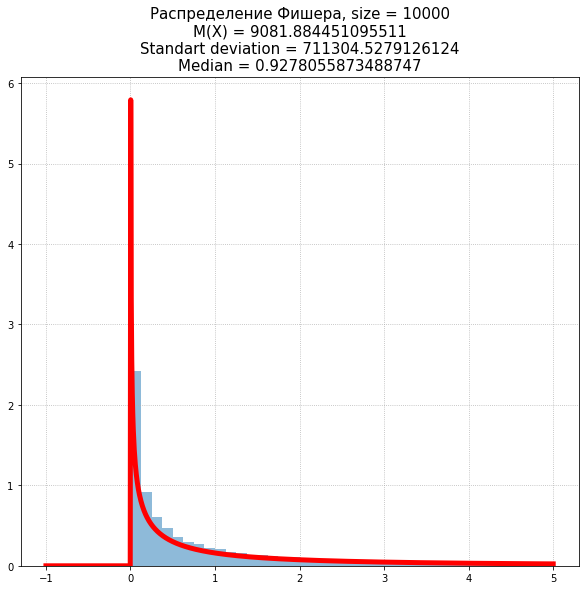

In [10]:
d1, d2, s = 1, 1, 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        f_data = spystats.f(d1, d2).rvs(size = s)
        grid = np.linspace(-1, 5, 1000)
        plt.hist(f_data, bins="auto", density=True, range=(-1, 5),
                        alpha=0.5, label="Гистограмма выборки")
        plt.plot(grid, spystats.f(d1, d2).pdf(grid), color="red",
                        lw=5, label="Плотность случайной величины")
        plt.title("Распределение Фишера, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                f_data.mean(), f_data.std(), np.median(f_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim

11) Распределение Вейбулла

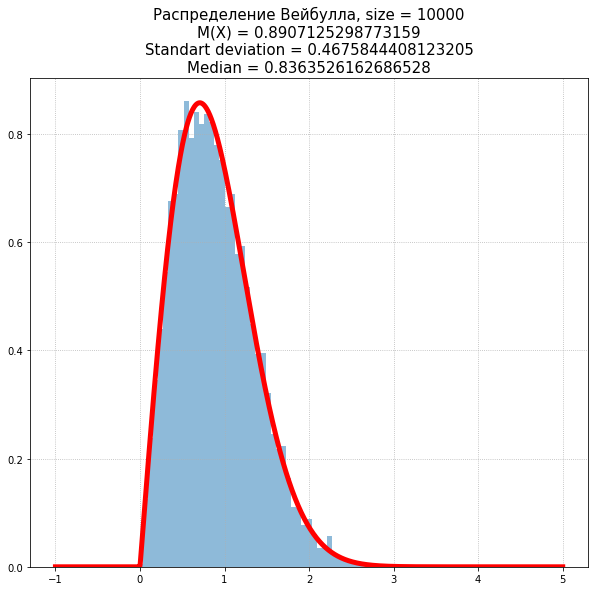

In [11]:
c, s = 2, 100
fig = plt.figure(figsize=(10, 9))

def animatebinom(i):
        plt.cla()
        s = 10 ** (i + 1)
        weibull_data = spystats.weibull_min(c).rvs(size = s)
        grid = np.linspace(-1, 5, 1000)
        plt.hist(weibull_data, bins="auto", density=True, range=(-1, 5),
                        alpha=0.5, label="Гистограмма выборки")
        plt.plot(grid, spystats.weibull_min(c).pdf(grid), color="red",
                        lw=5, label="Плотность случайной величины")
        plt.title("Распределение Вейбулла, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(s,
                                                weibull_data.mean(), weibull_data.std(), np.median(weibull_data)), fontsize=15)
        plt.grid(ls=":")

anim = animation.FuncAnimation(fig, animatebinom, frames=4, interval=1000)
anim